In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [ ]:
#cpu - gpu configuration
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.compat.v1.Session(config=config) 
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
# loading dataset
data = np.load('/content/drive/My Drive/Colab Notebooks/data.npy')

In [ ]:
data.shape

(26740, 2305)

In [ ]:
data.size

61635700

In [ ]:
data

array([['okey', '128', '128', ..., '127', '99', '49'],
       ['okey', '66', '69', ..., '82', '82', '82'],
       ['okey', '66', '69', ..., '82', '82', '82'],
       ...,
       ['notokey', '38', '19', ..., '131', '130', '133'],
       ['notokey', '46', '68', ..., '153', '155', '155'],
       ['notokey', '25', '32', ..., '132', '133', '138']], dtype='<U7')

In [ ]:
print("Number of Instances: ",data.size)

Number of Instances:  61635700


In [ ]:
# Splitting into id and class label
x = data[:,1:].astype(int) # id means pixel values
y = data[:,0] # class label
y


array(['okey', 'okey', 'okey', ..., 'notokey', 'notokey', 'notokey'],
      dtype='<U7')

In [ ]:
y2 = y
y2

array(['okey', 'okey', 'okey', ..., 'notokey', 'notokey', 'notokey'],
      dtype='<U7')

In [ ]:
for i in range(len(y2)):
  if y2[i] == 'okey':
    y2[i]='0'
  elif y2[i] == 'notokey':
    y2[i]='1'

In [ ]:
y2

array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U7')

In [ ]:
y = y.astype(int)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# so total we have 26740 data
print(x.shape)


(26740, 2304)


In [ ]:
print(y.shape)

(26740,)


In [ ]:
# splitting all data into train and test set, for train we have 70% data and for test we have 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 47, test_size = 0.3)

In [ ]:
# printing train dataset's size
print("For training we have: ",x_train.shape[0]," rows")

For training we have:  18718  rows


In [ ]:
print("For testing we have: ",x_test.shape[0]," rows")

For testing we have:  8022  rows


In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
x_train

array([[ 24,  27,  30, ...,  12,  16,  12],
       [  2,   6,   6, ..., 124, 128, 140],
       [179, 175, 172, ...,  39,  40,  40],
       ...,
       [174, 174, 178, ...,  34,  34,  34],
       [ 66,  70,  78, ..., 176, 184, 188],
       [134, 132, 134, ...,  22,  19,  21]])

In [ ]:
x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_test = x_test.reshape(x_test.shape[0],48,48,1)

In [ ]:
num_classes = 2
batch_size = 256

In [ ]:
model = Sequential()
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

In [ ]:
from keras.utils import to_categorical
history = model.fit(x_train, to_categorical(y_train),
          batch_size=256,
          shuffle=True,
          epochs=25,
          validation_data=(x_test, to_categorical(y_test)))

Epoch 1/25
74/74 [==============================] - 3s 36ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0372 - val_accuracy: 0.9869
Epoch 2/25
74/74 [==============================] - 3s 34ms/step - loss: 0.0306 - accuracy: 0.9884 - val_loss: 0.0534 - val_accuracy: 0.9818
Epoch 3/25
74/74 [==============================] - 3s 34ms/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.0560 - val_accuracy: 0.9818
Epoch 4/25
74/74 [==============================] - 3s 34ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 5/25
74/74 [==============================] - 3s 35ms/step - loss: 0.0183 - accuracy: 0.9928 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 6/25
74/74 [==============================] - 3s 35ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0406 - val_accuracy: 0.9864
Epoch 7/25
74/74 [==============================] - 3s 35ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 8/25
74

In [ ]:
#Saving my model
model.save('mycnnmodel.h5')


In [ ]:
test_scores = model.evaluate(x_test, to_categorical(y_test))

251/251 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9900


In [ ]:
print('Testing Accuracy: %.3f' % test_scores[1])
print('Testing Loss: %.3f' % test_scores[0])

Testing Accuracy: 0.990
Testing Loss: 0.050


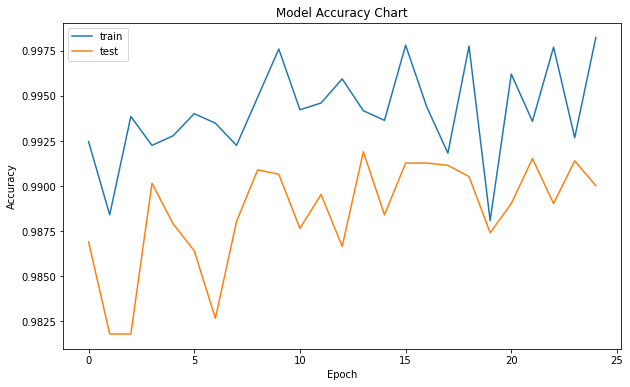

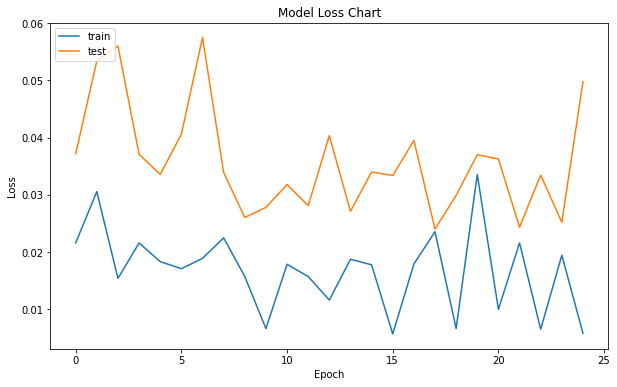

In [ ]:
# summarize history for accuracy
fig = plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
fig = plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Chart')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print(y_test)

[1 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3878,   39],
       [  41, 4064]])

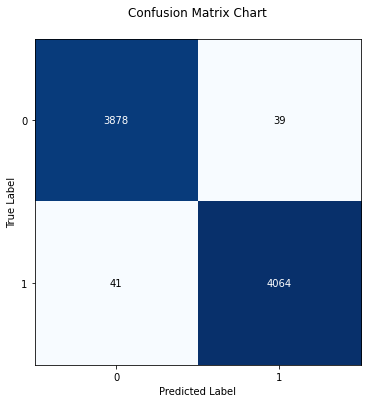

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),figsize=(6, 6))
plt.title('Confusion Matrix Chart')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


print ('Classification Report : ')
print (classification_report(y_test, y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3917
           1       0.99      0.99      0.99      4105

    accuracy                           0.99      8022
   macro avg       0.99      0.99      0.99      8022
weighted avg       0.99      0.99      0.99      8022



In [ ]:
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print('Area Under ROC curve:',roc_auc_score(y_test, y_pred))
print('Logarithmic Loss Value is',log_loss(y_test, y_pred))

Accuracy Score is 0.9900274245823985
Area Under ROC curve: 0.99002779041481
Logarithmic Loss Value is 0.3444444397771927


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print ('R Squared Error =',r2_score(y_test, y_pred))
print ('Mean Absolute Error =',mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error =',mean_squared_error(y_test, y_pred))

R Squared Error = 0.9600877775348842
Mean Absolute Error = 0.009972575417601595
Mean Squared Error = 0.009972575417601595


In [ ]:
import random



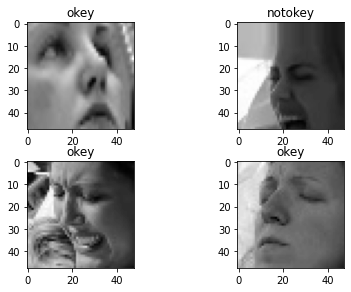

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
for i in range(2):
  for j in range(2):
    num = random.randrange(10000, 20000)
    axs[i,j].imshow(np.resize(x[num],(48,48)),cmap="gray")
    axs[i,j].set_title(y[num])

[0]
Normal


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


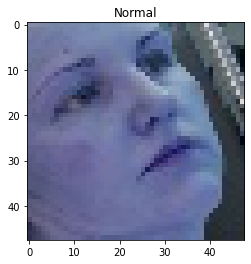

In [ ]:

file = '/content/drive/My Drive/Colab Notebooks/okey (16).jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
custom = model.predict_classes(x)
print(custom)
if custom[0] == 1:
  res = 'Risky'
elif custom[0] == 0:
  res = 'Normal'
print(res)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.title(res)
plt.show()

In [ ]:
for i in range(1,11):
  file = '/content/drive/My Drive/Colab Notebooks/okeynot ('+str(i)+').jpg'
  true_image = image.load_img(file)
  img = image.load_img(file, grayscale=True, target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  custom = model.predict_classes(x)
  if custom[0] == 1:
    res = 'Risky'
  elif custom[0] == 0:
    res = 'Normal'
  print(i,"\t",res)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 	 Risky
2 	 Risky
3 	 Risky
4 	 Risky
5 	 Risky
6 	 Risky
7 	 Risky
8 	 Risky
9 	 Risky
10 	 Risky


In [ ]:
# For Normal Result testing
for i in range(1,11):
  file = '/content/drive/My Drive/Colab Notebooks/okey ('+str(i)+').jpg'
  true_image = image.load_img(file)
  img = image.load_img(file, grayscale=True, target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  custom = model.predict_classes(x)
  if custom[0] == 1:
    res = 'Risky'
  elif custom[0] == 0:
    res = 'Normal'
  print(i,"\t",res)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 	 Normal
2 	 Normal
3 	 Normal
4 	 Normal
5 	 Normal
6 	 Normal
7 	 Normal
8 	 Normal
9 	 Normal
10 	 Normal
